In [36]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Project_Disease_Prediction\\datasets\\hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [3]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
df['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [6]:
df['binaryClass'] = df['binaryClass'].replace(['P','N'], [0, 1])
display(df)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,0
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,0
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,0
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,0
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,0
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,0
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,0
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,0


In [7]:
df = df.replace(['t', 'f'], [1, 0])
display(df)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,0
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,?,0,?,0,?,0,?,other,0
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,?,SVI,0
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,?,other,0
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,?,SVI,0


In [8]:
df['TBG'].value_counts()

?    3772
Name: TBG, dtype: int64

In [9]:
del df['TBG']

In [10]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,2,1,102,0,?,0,?,0,other,0
2,46,M,0,0,0,0,0,0,0,0,...,?,1,109,1,0.91,1,120,0,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1.9,1,175,0,?,0,?,0,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,0


In [11]:
df=df.replace({"?":np.NAN})

In [12]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,2,1,102,0,NaN,0,NaN,0,other,0
2,46,M,0,0,0,0,0,0,0,0,...,NaN,1,109,1,0.91,1,120,0,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1.9,1,175,0,NaN,0,NaN,0,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,0


In [13]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [14]:
df['sex'].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [15]:
df['sex'] = df['sex'].replace(['F', 'M'], [1, 0])
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,1.0,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,0
1,23,1.0,0,0,0,0,0,0,0,0,...,2,1,102,0,NaN,0,NaN,0,other,0
2,46,0.0,0,0,0,0,0,0,0,0,...,NaN,1,109,1,0.91,1,120,0,other,0
3,70,1.0,1,0,0,0,0,0,0,0,...,1.9,1,175,0,NaN,0,NaN,0,other,0
4,70,1.0,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,0


In [16]:
df['referral source'].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [17]:
del df['referral source']

In [18]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [19]:
df['T4U measured'].fillna(df['T4U measured'].mean(), inplace=True)
df['sex'].fillna(df['sex'].mean(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,NaN,0,NaN,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,NaN,1,109.0,1,0.91,1,120.0,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9,1,175.0,0,NaN,0,NaN,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,0,0


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [21]:
df['TSH'] = imputer.fit_transform(df[['TSH']])

df['T3'] = imputer.fit_transform(df[['T3']])

df['TT4'] = imputer.fit_transform(df[['TT4']])

df['T4U'] = imputer.fit_transform(df[['T4U']])

df['FTI'] = imputer.fit_transform(df[['FTI']])

In [22]:
df.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.0,1,1.140,1,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.0,0,0.995,0,110.469649,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.0,1,0.910,1,120.000000,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.0,0,0.995,0,110.469649,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.0,1,0.870,1,70.000000,0,0
5,18.0,1.0,1,0,0,0,0,0,0,0,...,0,2.0135,1,183.0,1,1.300,1,141.000000,0,0
6,59.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,72.0,1,0.920,1,78.000000,0,0
7,80.0,1.0,0,0,0,0,0,0,0,0,...,1,0.6000,1,80.0,1,0.700,1,115.000000,0,0
8,66.0,1.0,0,0,0,0,0,0,0,0,...,1,2.2000,1,123.0,1,0.930,1,132.000000,0,0
9,68.0,0.0,0,0,0,0,0,0,0,0,...,1,1.6000,1,83.0,1,0.890,1,93.000000,0,0


In [23]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [24]:
display(df.shape)

display(df['binaryClass'].unique())

(3772, 28)

array([0, 1], dtype=int64)

# Data Visualization

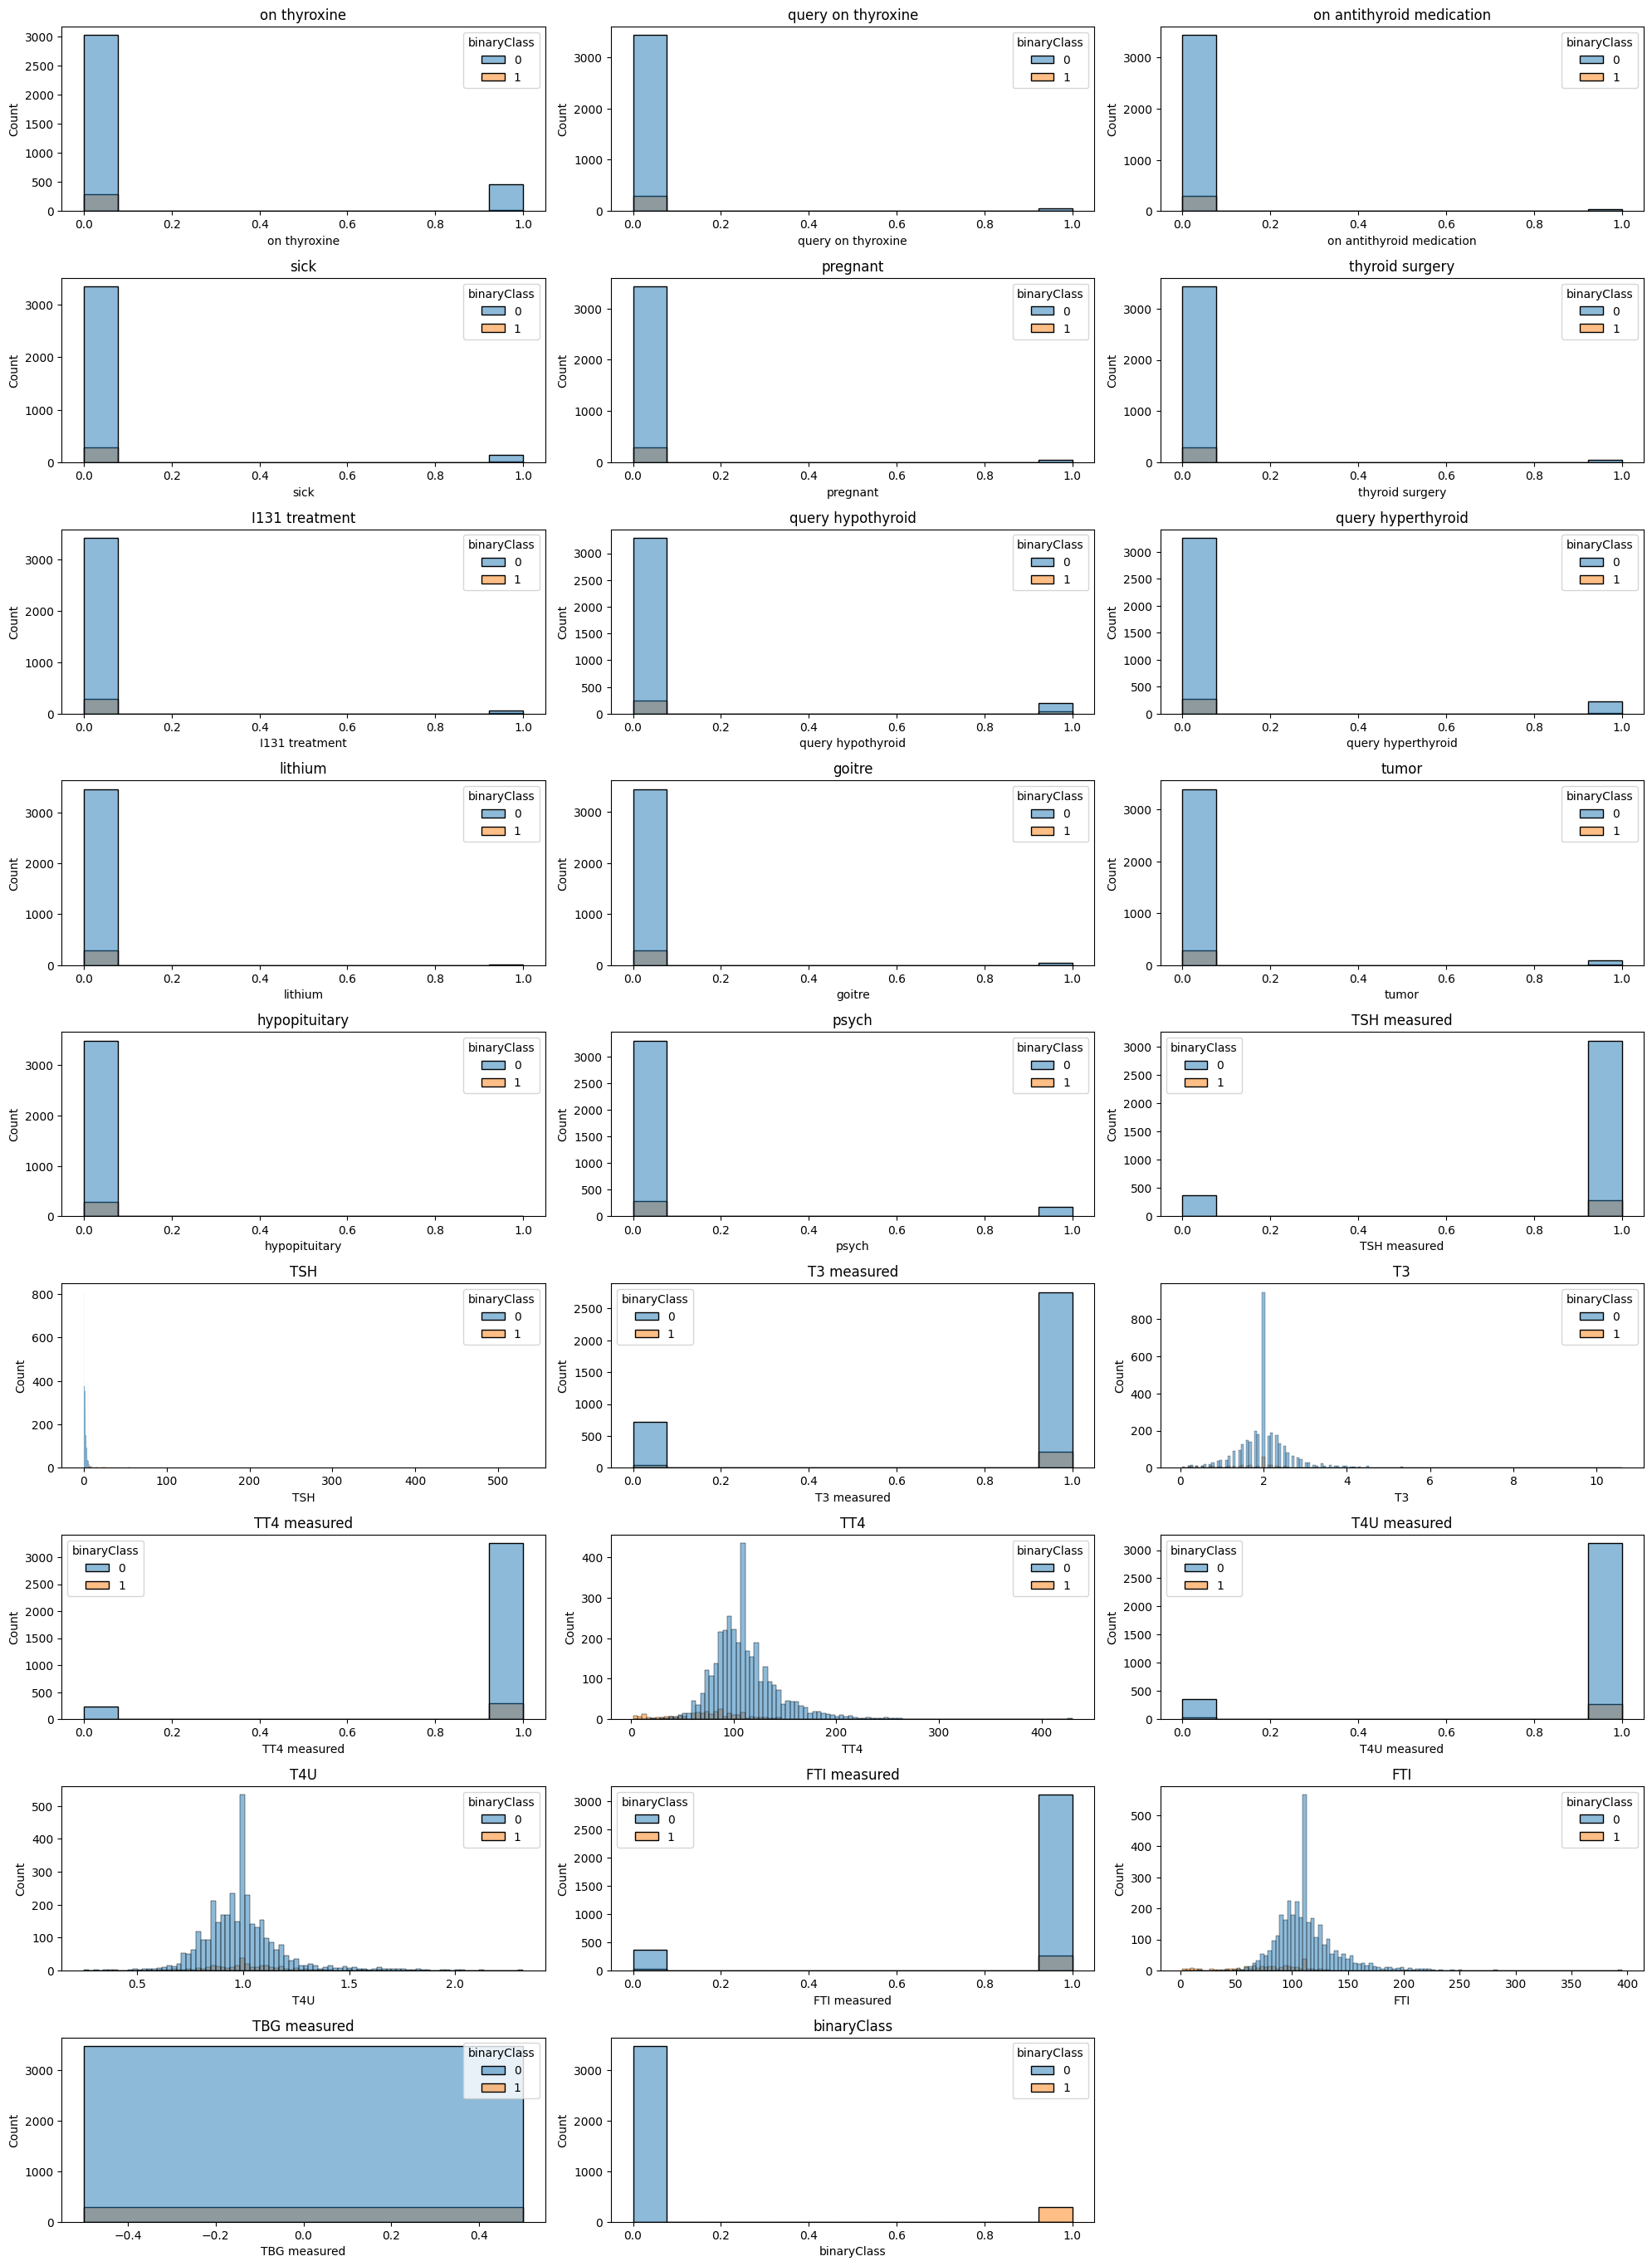

In [27]:
num_list = list(df.columns)   # Taking all the columns
num_list = num_list[2:]   # except the first 2

fig = plt.figure(figsize=(20,30))

for i in range(len(num_list)):
    plt.subplot(10,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='binaryClass')

plt.tight_layout()

In [32]:
X = df.iloc[:, :27]
Y = df.loc[:,['binaryClass']]

display(X.head())
display(Y.head())

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.30,1,2.5000,1,125.0,1,1.140,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.10,1,2.0000,1,102.0,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.98,0,2.0135,1,109.0,1,0.910,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.16,1,1.9000,1,175.0,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.72,1,1.2000,1,61.0,1,0.870,1,70.000000,0


,binaryClass
0,0
1,0
2,0
3,0
4,0


In [33]:
no_input_nodes = X.shape[1]
print(no_input_nodes)

no_output_nodes = len(Y['binaryClass'].unique())
print(no_output_nodes)

27
2


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=44)

In [37]:
Classification_model = Sequential(
    [
        tf.keras.Input(shape=(no_input_nodes,)),
        Dense(256, activation='relu', name='layer_1'),
        Dropout(0.2),
        Dense(128, activation='relu', name='layer_2'),
        Dropout(0.2),
        Dense(63, activation='relu', name='layer_3'),
        Dropout(0.1),
        Dense(no_output_nodes, activation='softmax', name='output_layer')
    ]
)

Classification_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [38]:
Classification_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 256)               7168      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 layer_3 (Dense)             (None, 63)                8127      
                                                                 
 dropout_2 (Dropout)         (None, 63)                0         
                                                                 
 output_layer (Dense)        (None, 2)                 1

In [39]:
Classification_model.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
3017/3017 [==============================] - 9s 2ms/step - loss: 0.4301 - accuracy: 0.9042
Epoch 2/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.2562 - accuracy: 0.9301
Epoch 3/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.2188 - accuracy: 0.9383
Epoch 4/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.2023 - accuracy: 0.9413
Epoch 5/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.1715 - accuracy: 0.9476
Epoch 6/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.1446 - accuracy: 0.9506
Epoch 7/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.1411 - accuracy: 0.9536
Epoch 8/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.1140 - accuracy: 0.9642
Epoch 9/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.1134 - accuracy: 0.9556
Epoch 10/50
3017/3017 [==============================] - 7s 2ms/step - loss: 0.105

In [40]:
score, acc = Classification_model.evaluate(X_train, y_train, batch_size=1)

print('Train score', score *100)
print('Train accuracy', acc *100)

3017/3017 [==============================] - 6s 2ms/step - loss: 0.0468 - accuracy: 0.9821
Train score 4.679746180772781
Train accuracy 98.21014404296875


In [1]:
import pickle

In [2]:
pickle.dump(Classification_model, open("D:\\Project_Disease_Prediction\\models\\thyroid_detect.pkl", "wb"))

NameError: name 'Classification_model' is not defined

In [3]:
model = pickle.load(open("D:\\Project_Disease_Prediction\\models\\thyroid_detect.pkl", "rb"))
model.evaluate(X_train, y_train, batch_size = 1)

NameError: name 'X_train' is not defined

In [37]:
len(X_test)

755

In [39]:
input1 = X_test.iloc[[651]]
input1

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
1710,67.0,0.0,0,0,0,0,0,0,0,0,...,0.25,1,2.0,1,101.0,1,0.81,1,124.0,0


In [42]:
pred = Classification_model.predict(input1)
pred

1/1 [==============================] - 0s 32ms/step


array([[1.0000000e+00, 4.0156176e-13]], dtype=float32)

In [43]:
np.argmax(pred)

0

In [44]:
df.iloc[[1710]]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
1710,67.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0,1,101.0,1,0.81,1,124.0,0,0
